In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Darvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# filter for the job titles and country
df_IN = df[(df['job_country'] == 'India')].dropna(subset=['salary_year_avg'])

In [5]:
job_titles = df_IN['job_title_short'].value_counts().index[:6].tolist()

# filter the df for the top 6 job titles
df_IN_top6 = df_IN[df_IN['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_IN_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

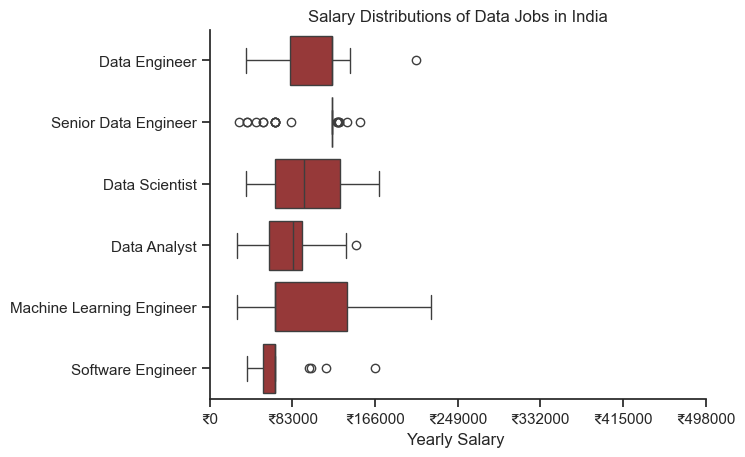

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_IN_top6 and job_order are already defined

sns.set_theme(style='ticks')

# Define a custom color or palette
custom_color = 'Brown'  # Replace this with your desired color or palette

# Create the boxplot with the custom color
sns.boxplot(data=df_IN_top6, x='salary_year_avg', y='job_title_short', order=job_order, color=custom_color)
sns.despine()

# Set the title and labels
plt.title('Salary Distributions of Data Jobs in India')
plt.xlabel('Yearly Salary ')
plt.ylabel('')
plt.xlim(0, 600000) 

# Custom tick formatter for the x-axis
ticks_x = plt.FuncFormatter(lambda y, pos: f'₹{int((y*83)/100)}')
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.show()


In [21]:
# Only get data analyst jobs in the US
df_DA_IN = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_IN = df_DA_IN.dropna(subset=['salary_year_avg'])

df_DA_IN = df_DA_IN.explode('job_skills')

df_DA_IN[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [22]:
df_DA_top_pay = df_DA_IN.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


In [35]:
df_DA_skills = df_DA_IN.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


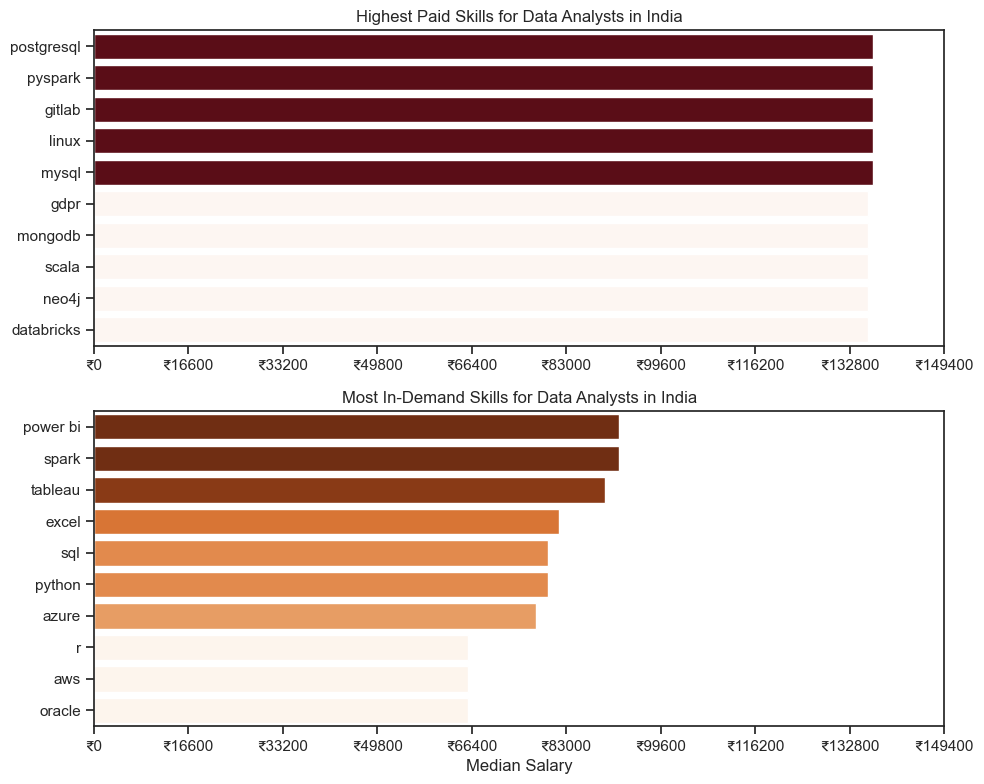

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_DA_top_pay and df_DA_skills are already defined
fig, ax = plt.subplots(2, 1, figsize=(10, 8))  

# Define custom colors or palettes
top_pay_palette = 'Reds'
in_demand_palette = 'Oranges' 

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette=top_pay_palette)
ax[0].legend().remove()
ax[0].set_title('Highest Paid Skills for Data Analysts in India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_xlim(0, 180000) 
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{int((x*83)/100)}'))

# Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette=in_demand_palette)
ax[1].legend().remove()
ax[1].set_title('Most In-Demand Skills for Data Analysts in India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary')
ax[1].set_xlim(0, 180000)  
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{int((x*83)/100)}'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()
